In [ ]:
[과제]

- 전처리 후 실루엣 스코어를 이용하여 평가 및 시각화
    - 의미없는 데이터 삭제
    - Country가 영국인 경우만 선택
    - RFM 기반 데이터 가공
        - 고객 분류는 고객의 어떤 요소를 기반으로 군집화 할 것인가를 결정하는 것이 중요하며 
          예를들어 Recendcy(R), Frequency(F), Monetary Value(M) 을 의미하는 RFM 기법이 있다
        - Recency : 가장 최근 상품 구입일에서 오늘까지의 기간
        - Frequency : 상품 구매 횟수
        - Monetary Value : 총 구매 금액
    - 군집 개수는 3
    - 여러개의 클러스터링 갯수(2,3,4,5)를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
- 데이터 분포의 왜곡을 해결하기 위한 로그 변환 후 평가 및 시각화

In [1]:
import pandas as pd

df = pd.read_excel('dataset/Online_Retail.xlsx')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# Quantity, UnitPrice 0보다 작은값 제외, customerID 너무 많은 null 값. null값인것들 제외

df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df = df[df['CustomerID'].notnull()]
print(df.shape)
df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [6]:
# df.drop('CustomerID',axis=1,inplace=True)

In [7]:
# 영국만 선택

df = df[(df['Country'])=='United Kingdom']
df.shape

(354321, 8)

In [8]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541889    581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
541890    581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
541891    581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
541892    581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
541893    581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  Cust

In [9]:
############################################################################################################################################
############################################################################################################################################

# RFM 기반 데이터 가공하기

df['sale_amount'] = df['Quantity'] * df['UnitPrice']    # 총구매액 데이터 ( 구매갯수 x 상품개별가격 )
df['CustomerID'] = df['CustomerID'].astype(int)
print('고객 ID 별 주문 건수 (valeu_counts)')
print(df['CustomerID'].value_counts()[:5])
print()
print('고객 ID 별 최고 구매액 top5')
print(df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])
print(df.groupby('CustomerID')['sale_amount'].sum().mean())

고객 ID 별 주문 건수 (valeu_counts)
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: CustomerID, dtype: int64

고객 ID 별 최고 구매액 top5
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64
1864.3856005102027


In [10]:
df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count()

InvoiceNo  StockCode
536365     21730        1
           22752        1
           71053        1
           84029E       1
           84029G       1
                       ..
581585     84946        1
581586     20685        1
           21217        1
           22061        1
           23275        1
Name: InvoiceNo, Length: 344435, dtype: int64

In [11]:
# InvoiceNo + StockCode 로 Groupby를 수행하면 유일한 식별자 레벨 
df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [12]:
aggregations = {
    'InvoiceDate' : 'max',
    'InvoiceNo' : 'count',
    'sale_amount' : 'sum'
}

cust_df = df.groupby('CustomerID').agg(aggregations)
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency', 'InvoiceNo':'Frequency','sale_amount':'Monetary'})
cust_df = cust_df.reset_index()
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73
3,12749,2011-12-06 09:56:00,199,4090.88
4,12820,2011-12-06 15:12:00,59,942.34


In [13]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x : x.days + 1)
cust_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73
3,12749,4,199,4090.88
4,12820,4,59,942.34


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <BarContainer object of 10 artists>)

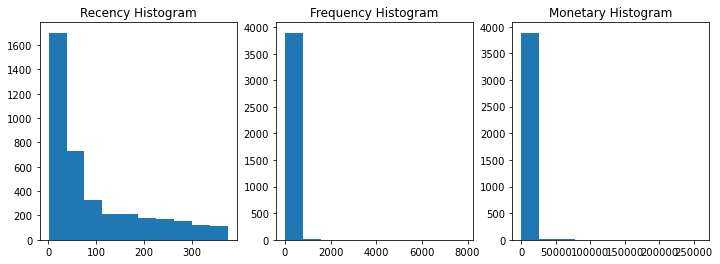

In [14]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df.Recency)

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df.Frequency)

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df.Monetary)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, max_iter=300, random_state=0)

labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels


print('실루엣 스코어는 : {:.3f}'.format(silhouette_score(X_features_scaled, labels)))
cust_df

실루엣 스코어는 : 0.592


,CustomerID,Recency,Frequency,Monetary,cluster_label
0,12346,326,1,77183.60,0
1,12747,3,103,4196.01,1
2,12748,1,4595,33719.73,0
3,12749,4,199,4090.88,1
4,12820,4,59,942.34,1
...,...,...,...,...,...
3915,18280,278,10,180.60,2
3916,18281,181,7,80.82,2
3917,18282,8,12,178.05,1
3918,18283,4,756,2094.88,1


In [16]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [17]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

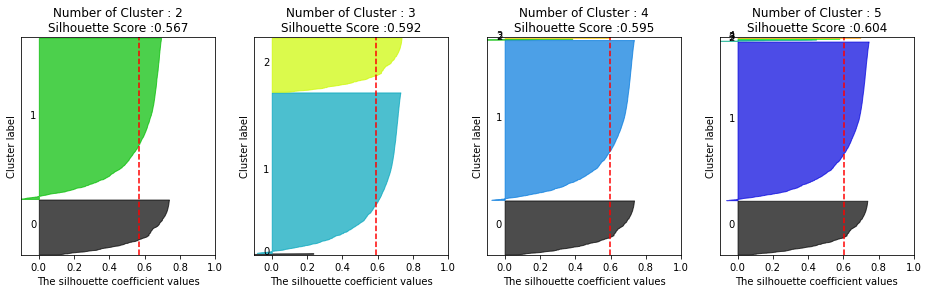

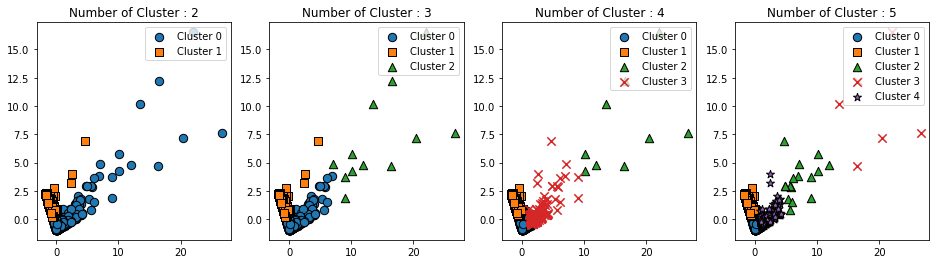

In [18]:
import numpy as np
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [19]:
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels
print('실루엣 스코어:{:.4f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어:0.3033


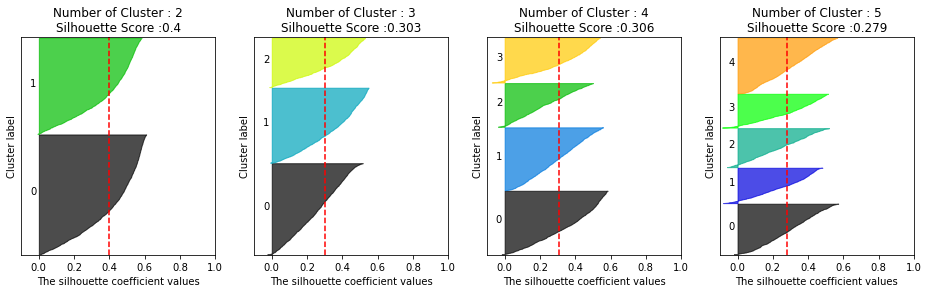

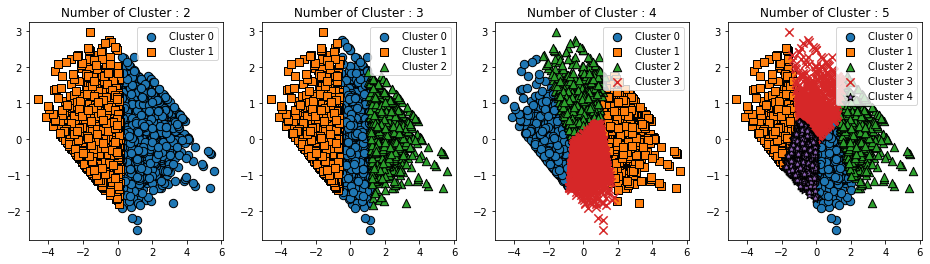

In [20]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [106]:
features = ['Recency','Frequency','Monetary']
for i in features:
    cust_df[i] = np.log1p(cust_df[i])
    
cust_df

,CustomerID,Recency,Frequency,Monetary,cluster_label,Recency_log,Frequency_log,Monetary_log
0,12346,1.070022,0.423036,1.254433,0,1.070022,0.423036,1.254433
1,12747,0.625800,1.004544,1.173885,1,0.625800,1.004544,1.173885
2,12748,0.423036,1.176871,1.234273,1,0.423036,1.176871,1.234273
3,12749,0.672503,1.043904,1.173044,1,0.672503,1.043904,1.173044
4,12820,0.672503,0.966273,1.118559,1,0.672503,0.966273,1.118559
...,...,...,...,...,...,...,...,...
3915,18280,1.061875,0.798928,1.038452,0,1.061875,0.798928,1.038452
3916,18281,1.038578,0.753653,0.988513,0,1.038578,0.753653,0.988513
3917,18282,0.771165,0.820286,1.037643,0,0.771165,0.820286,1.037643
3918,18283,0.672503,1.109224,1.149716,1,0.672503,1.109224,1.149716


(array([2.000e+00, 1.000e+00, 8.000e+00, 3.100e+01, 2.460e+02, 1.024e+03,
        1.447e+03, 9.830e+02, 1.530e+02, 2.500e+01]),
 array([0.93928224, 1.10537914, 1.27147605, 1.43757295, 1.60366986,
        1.76976677, 1.93586367, 2.10196058, 2.26805748, 2.43415439,
        2.60025129]),
 <BarContainer object of 10 artists>)

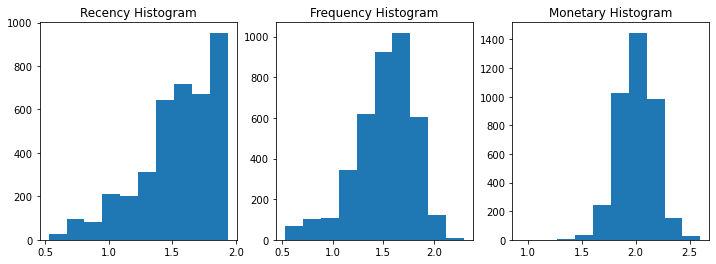

In [94]:
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df.Recency)

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df.Frequency)

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df.Monetary)

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)

labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels


print('실루엣 스코어는 : {:.3f}'.format(silhouette_score(X_features_scaled, labels)))
cust_df

실루엣 스코어는 : 0.322


,CustomerID,Recency,Frequency,Monetary,cluster_label
0,12346,1.915445,0.526589,2.505849,1
1,12747,0.869742,1.730662,2.234534,0
2,12748,0.526589,2.244208,2.435880,0
3,12749,0.959135,1.840283,2.231815,0
4,12820,0.959135,1.628131,2.060441,0
...,...,...,...,...,...
3915,18280,1.891788,1.223156,1.824841,1
3916,18281,1.825195,1.124748,1.687236,1
3917,18282,1.162283,1.271150,1.822558,1
3918,18283,0.959135,2.032004,2.157297,0


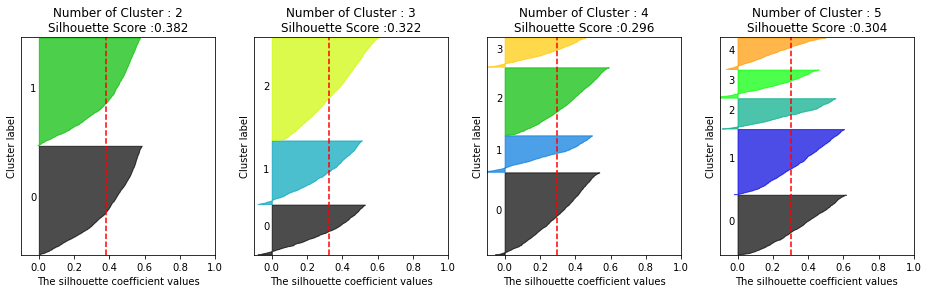

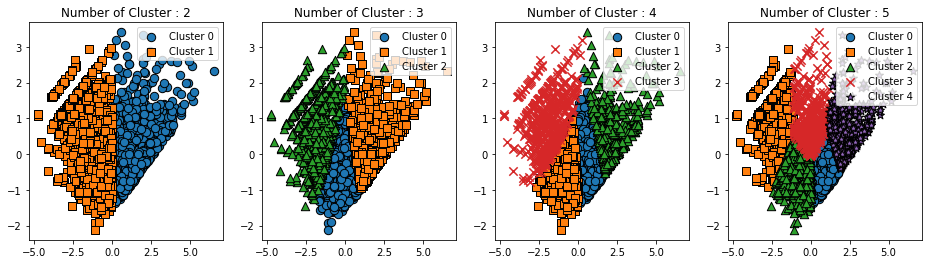

In [96]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)